**Practice task for Lesson 8**

Antonec Svetlana, Raines Evgenii

GSM3215435 dataset


In [ ]:
# Install packages
!pip install --quiet scikit-learn
!pip install --quiet numpy
!pip install --quiet scanpy
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!pip install louvain
!pip install leidenalg
!pip install scikit-learn
!pip install dask



In [ ]:
!pip install matplotlib==3.2.2

In [2]:
# Import packages
import louvain
import leidenalg
import sklearn
import dask
import libarchive
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  


In [5]:
!gzip data/features.tsv

In [6]:
# Import data
adata = sc.read_10x_mtx('/content/data/', var_names='gene_symbols')  

In [7]:
# Basic filtering 

sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=10)

GENES: 
                           gene_ids    feature_types  n_cells
Mrpl15          ENSMUSG00000033845  Gene Expression     1349
Lypla1          ENSMUSG00000025903  Gene Expression     1181
Tcea1           ENSMUSG00000033813  Gene Expression     1863
Atp6v1h         ENSMUSG00000033793  Gene Expression     1329
Rb1cc1          ENSMUSG00000025907  Gene Expression      917
...                            ...              ...      ...
AC168977.2      ENSMUSG00000094915  Gene Expression       17
AC168977.1      ENSMUSG00000079808  Gene Expression       65
PISD            ENSMUSG00000095041  Gene Expression     2263
DHRSX           ENSMUSG00000063897  Gene Expression     1017
CAAA01147332.1  ENSMUSG00000095742  Gene Expression       39

[13105 rows x 3 columns] 

OBSERVATIONS: 
                     n_genes
AAACCTGAGATGCCTT-1     2218
AAACCTGAGCTAGTGG-1     1209
AAACCTGCAAGCTGTT-1     2084
AAACCTGCACCGAATT-1     1961
AAACCTGCACGCTTTC-1      908
AAACCTGCAGGACCCT-1     2985
AAACCTGGTCACAAGG-1 

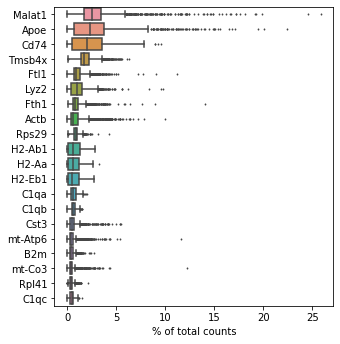

In [13]:
# Genes 
adata.obs.head(10)
print("GENES:", "\n", adata.var, "\n")
print("OBSERVATIONS:", "\n", adata.obs.head(10), "\n")
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
# Annotate the group of mitochondrial genes


adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var
print("Number of mitochondrial genes:", "\n", adata.var['mt'].value_counts())
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)

Number of mitochondrial genes: 
 False    13092
True        13
Name: mt, dtype: int64


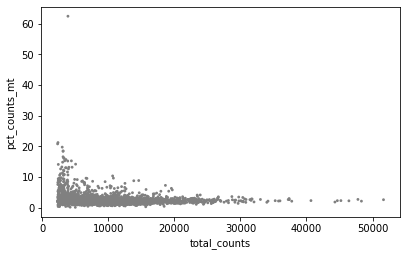

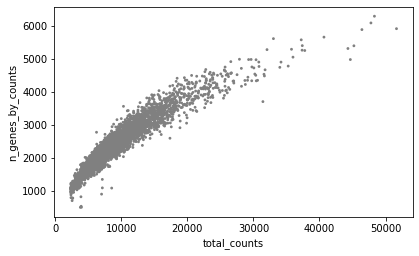

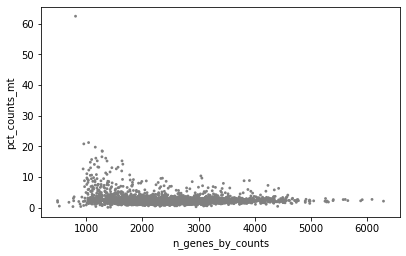

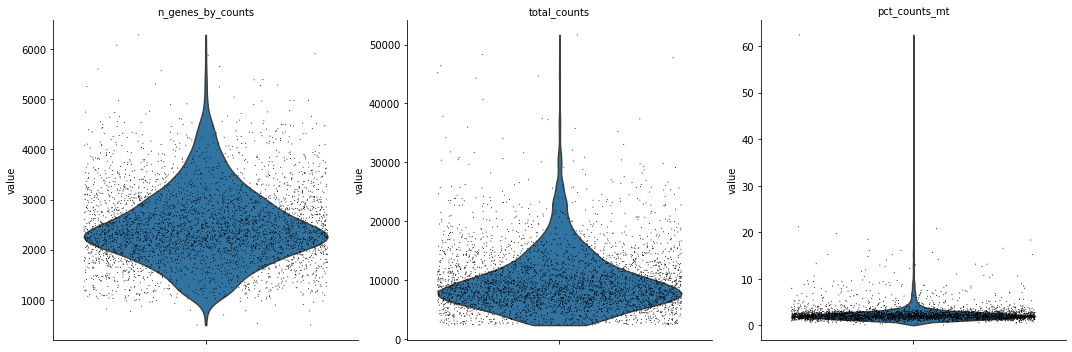

In [15]:
# Plots
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [16]:
# Filter

adata = adata[adata.obs.n_genes_by_counts > 1000, :].copy()
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

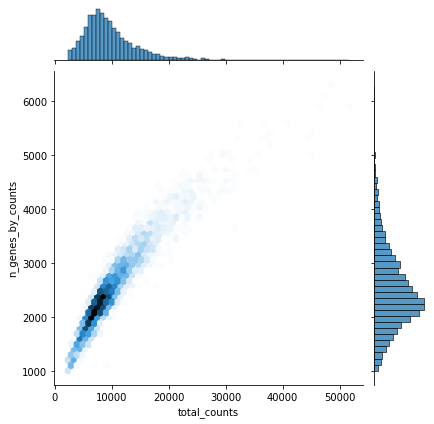

In [17]:
# Jointplot

import scanpy as sc
import seaborn as sns

sns.jointplot(
    data=adata.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

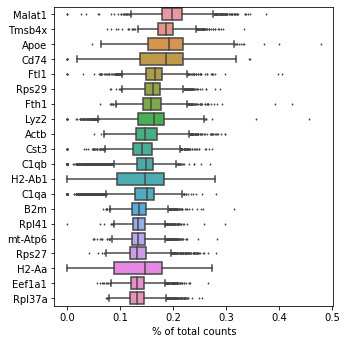

In [18]:
# Normalize

pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])
sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata)
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])
sc.pl.highest_expr_genes(adata, n_top=20, )

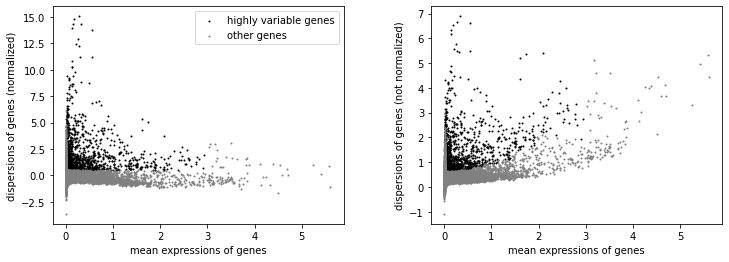

In [19]:
# Identification of highly variable features

import matplotlib.pyplot as plt
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
gca = sc.pl.highly_variable_genes(adata, show=False, log=False)

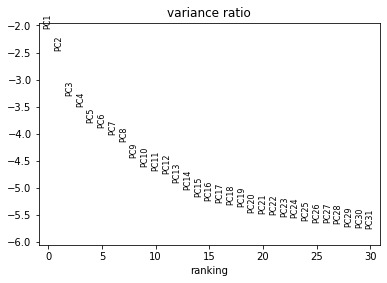

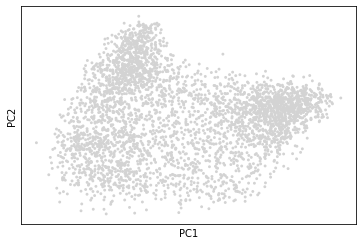

In [20]:
# PCA dimensionality reduction

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca(adata)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


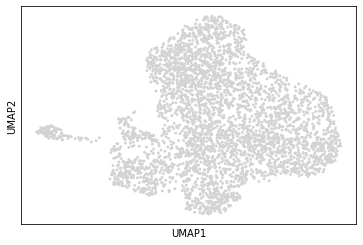

In [21]:
# Compute neghborhood graph and embedd it using UMAP

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata)

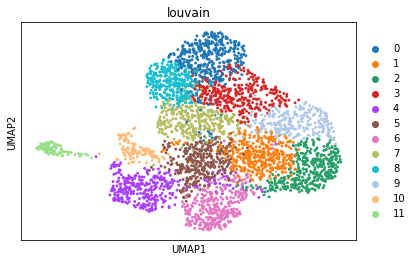

In [22]:
#  Cell clustering

sc.tl.louvain(adata, resolution=1.2)
sc.pl.umap(adata, color='louvain')

In [23]:
# Running DGE tests to find cluster biomarkers

sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1,2,3,4,5,6,7,8,9,10,11
0,Folr2,Atf3,Ifrd1,Jun,Napsa,Hexb,Lgals3,Aif1,Pf4,Ier3,Stmn1,Cd3g


TypeError: ignored

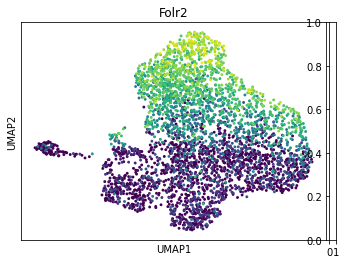

In [30]:
sc.pl.umap(adata, color=["Folr2"])
sc.pl.umap(adata, color=["Atf3"])
sc.pl.umap(adata, color=["Ifrd1"])

TypeError: ignored

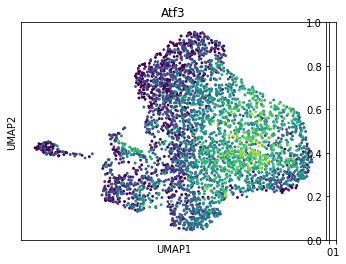

In [31]:
sc.pl.umap(adata, color=["Atf3"])

TypeError: ignored

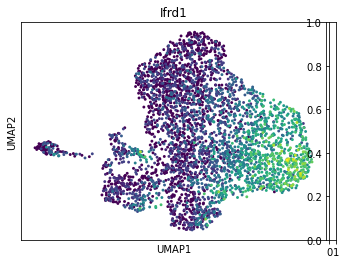

In [33]:
sc.pl.umap(adata, color=["Ifrd1"])

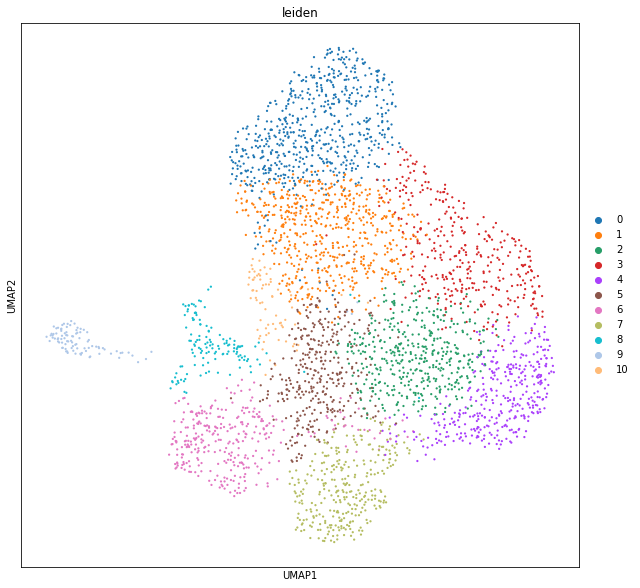

In [26]:
# Another clustering

from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (10, 10)}):
    sc.tl.leiden(adata, resolution=0.7)
    sc.pl.umap(adata, color='leiden', s=20)

In [27]:
# Extract embedding
adata.obsm
df = pd.DataFrame(adata.obsm['X_pca'])

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-9.782147,-4.836031,-2.377055,-1.583314,0.696351,-1.466231,-1.965507,-0.722408,0.908760,3.139494,...,0.583563,-0.560899,0.906958,-1.036729,-1.171195,-0.206673,-0.408988,0.740532,-0.453928,1.084192
1,-3.883418,9.840924,-7.323013,2.791461,-8.180953,0.044279,1.729870,7.658954,-0.498681,1.305792,...,-1.128360,0.548432,0.836149,0.648273,-0.301054,0.397769,-0.569397,-0.318107,-1.160867,0.184063
2,-5.497998,-7.979033,1.787935,1.133712,-3.293237,0.195706,2.291573,-3.449686,-0.066445,0.666961,...,-0.211319,0.829860,0.669394,0.511549,-1.045150,0.310171,-0.843846,-0.120248,-1.973280,0.477005
3,7.403188,-3.632700,-0.075779,0.592428,-1.471518,0.703673,-0.177621,-1.437364,0.704207,-0.749352,...,-0.861534,-0.701858,-1.431321,0.191238,-0.867634,0.889487,-0.949231,-0.140317,-0.808585,-0.714921
4,-0.775142,-5.962546,2.851030,0.697307,-3.285477,0.697993,0.554119,0.208530,2.080660,-1.125283,...,0.461042,-0.686425,0.020339,0.193830,-0.156686,-0.134606,2.738741,1.540706,-0.455039,0.151409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-3.261320,1.473258,-1.521026,-6.030884,-0.790383,-1.847983,0.202445,-1.169319,-1.592080,-0.183030,...,0.942182,-1.086117,-1.622877,0.722648,-0.360421,0.328471,-1.302886,-0.486157,-0.902084,0.426559
3596,8.621775,1.267774,-1.201109,0.854694,1.110113,2.685121,1.056711,-0.608654,-0.267017,1.834246,...,-0.220766,-0.948385,0.875783,-0.010398,-1.212512,0.678167,-0.028720,0.121374,-0.758085,1.956313
3597,-6.141578,1.852354,-0.874831,-5.394356,-0.841500,-2.055579,-2.100286,-1.687952,-1.285084,1.639191,...,-0.210473,0.537462,0.714148,0.480077,0.651931,0.030232,0.264392,-0.775935,0.804242,-1.255127
3598,7.561377,-3.503078,-1.073419,-1.486035,0.243521,0.947941,0.936763,0.728678,1.959532,-2.485293,...,1.510543,0.312928,-0.229330,-0.684322,-0.842148,0.125006,-0.226234,0.205164,0.246737,-0.829922


**Results**

1. The data was filtered out and then normalized with standart parameters.
2. With the UMAC the data was imbedded and then clustered effectively with 12 clusters found.
3. Found markers for each of the cluster are:  	Folr2 	Atf3 	Ifrd1 	Jun 	Napsa 	Hexb 	Lgals3 	Aif1 	Pf4 	Ier3 	Stmn1 	Cd3g
4. The markers have a specific gene expression in each of the cluster.

### Comparison to publication and R:


Clustering with t-sne: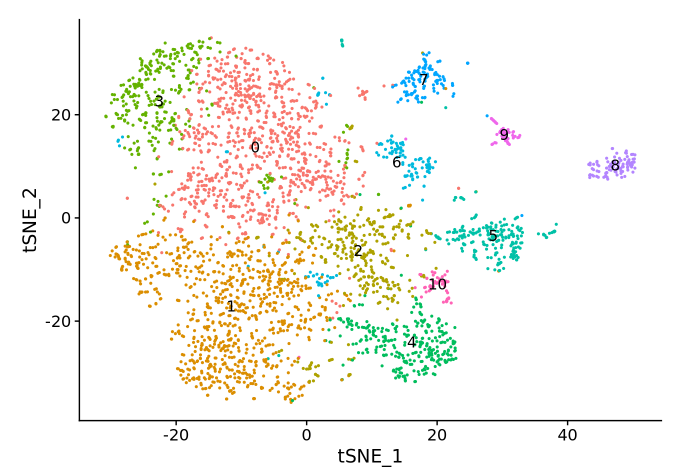

Clustering in publication: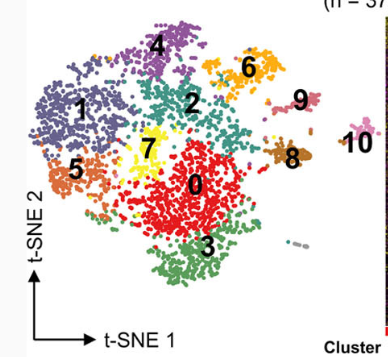

Clustering with scanpy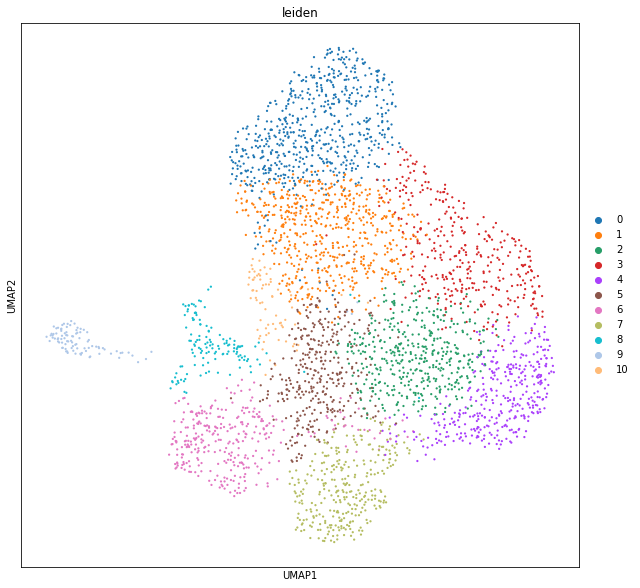

For all 3 clustering identified 10 clusters. 

In the paper mentioned, that cluster 10 is classical DC1. 
Itgae gene should be highly expressed in this cluster. 
Let's check that UMAP cluster 9 represent the same cell type

There is no such clear clustering for this gene as expected, so we can see differences in clusterisation


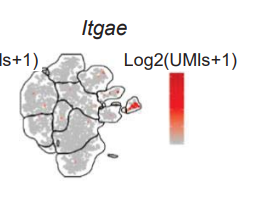
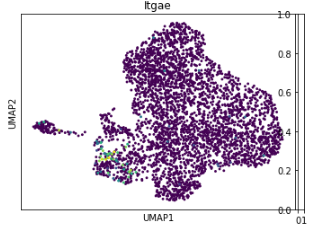

To compare more results of clustering with t-sne and publication let's build violin plots 
There is t-sne results

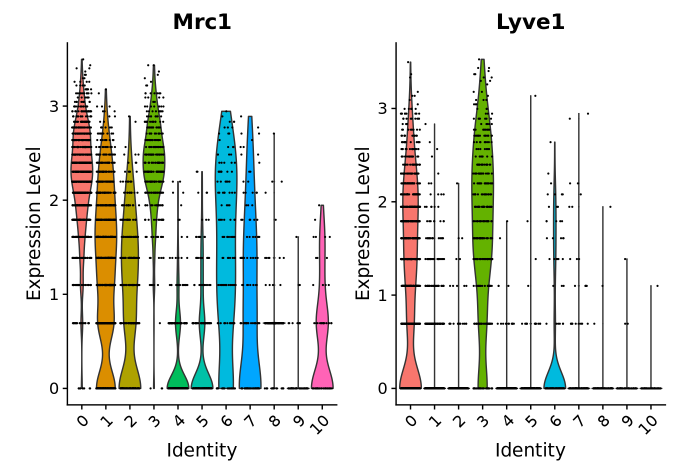

In [38]:
sc.tl.leiden(adata, key_added='clusters', resolution=0.5)

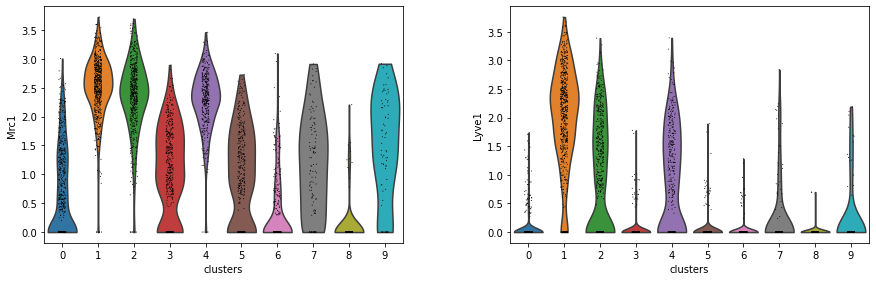

In [40]:
with rc_context({'figure.figsize': (6, 4.5)}):
    sc.pl.violin(adata, ['Mrc1', 'Lyve1'], groupby='clusters')


After comparison we can suggest, that cluster 4 for UMAP corespond to cluster 0 for t-sne and can be the cluster of resident adventitial macrophages.

Also, as clusters 0,1,2,3,4,5,7,10 have high expression of Mrc1, they are considered macrophage clusters